In [ ]:
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

In [ ]:
import keras.datasets.mnist as mnist
# Loading the dataset
dataset = mnist.load_data()
print(dataset)

(train_X, train_y), (test_X, test_y) = mnist.load_data()

#printing the shapes of the vectors
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))


11490434/11490434 [==============================] - 1s 0us/step
((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
  

There are 60000 images in the training dataset.
There are 10000 images in the testing dataset.
___________________
(28, 28)
___________________
index: 4493
Lable: 4


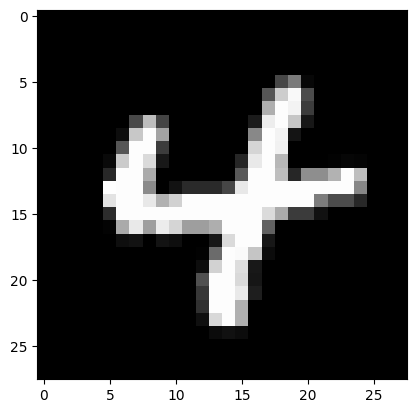

index: 20322
Lable: 1


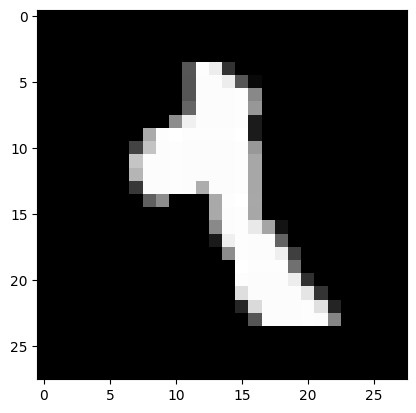

index: 11386
Lable: 6


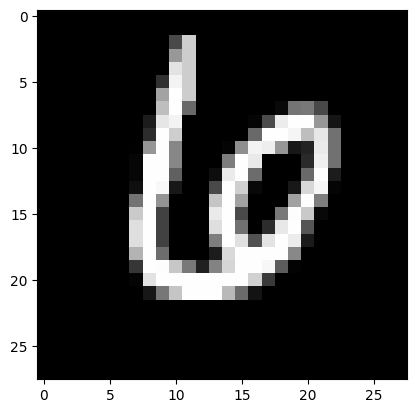

index: 54275
Lable: 9


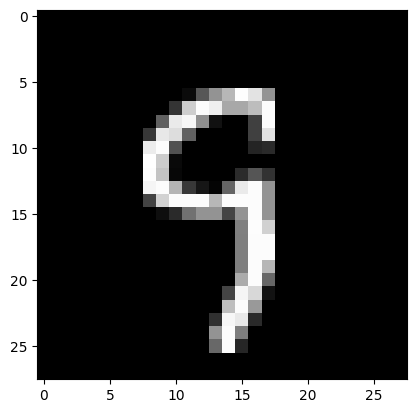

index: 48249
Lable: 5


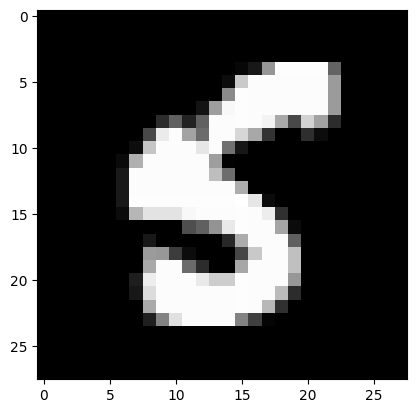

index: 29002
Lable: 7


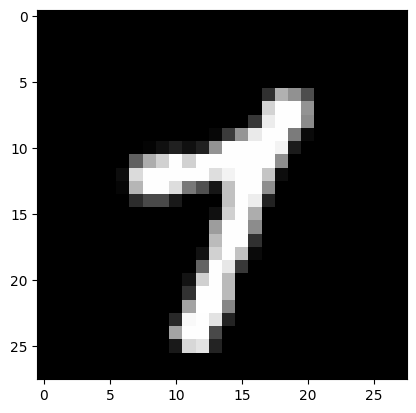

index: 56235
Lable: 8


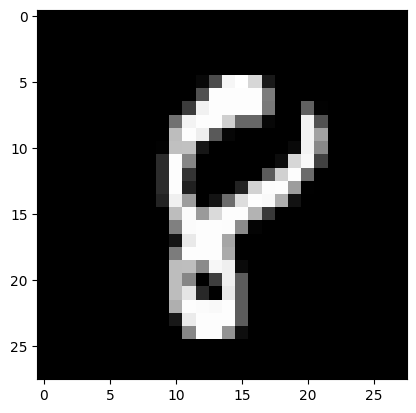

index: 25903
Lable: 4


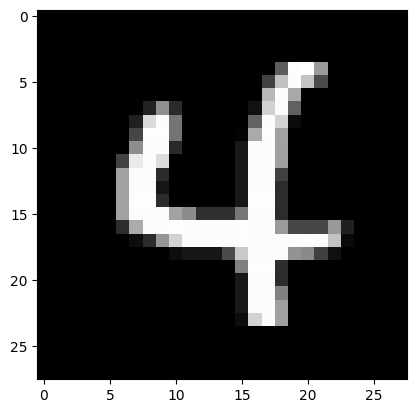

index: 31786
Lable: 9


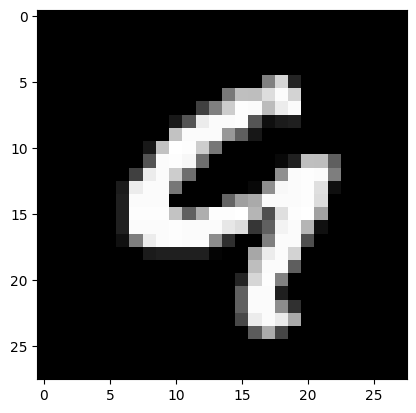

index: 57237
Lable: 8


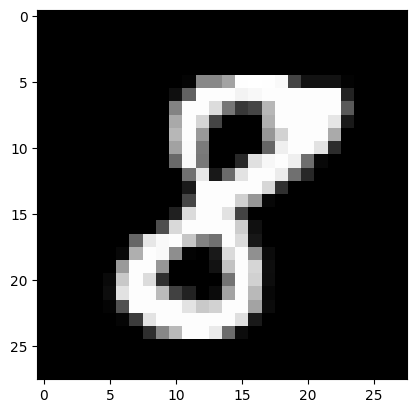

___________________


In [ ]:
# Print the number of images in the training and testing datasets
print(f"There are {len(dataset[0][0])} images in the training dataset.")
print(f"There are {len(dataset[1][0])} images in the testing dataset.")
print("___________________")

# Print the shape of the first image in the training dataset
print(dataset[0][0][0].shape)
print("___________________")
display_random_images_with_labels(dataset[0])
print("___________________")

Randomly printing 10 images with labels from testing dataset
index: 5695
Lable: 0


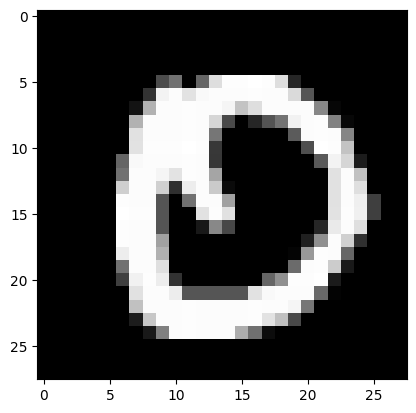

index: 8995
Lable: 1


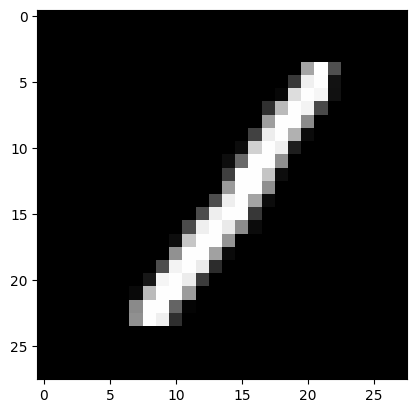

index: 7379
Lable: 8


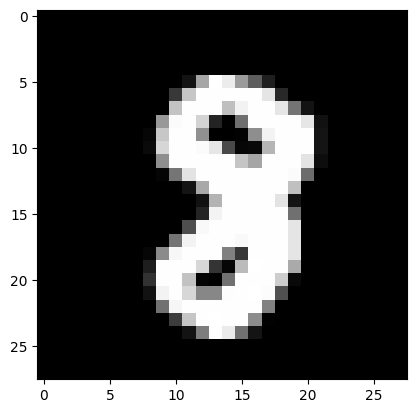

index: 9397
Lable: 9


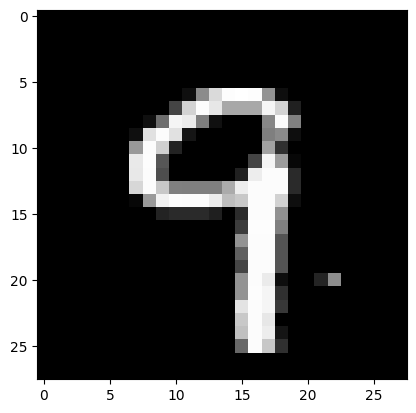

index: 1050
Lable: 2


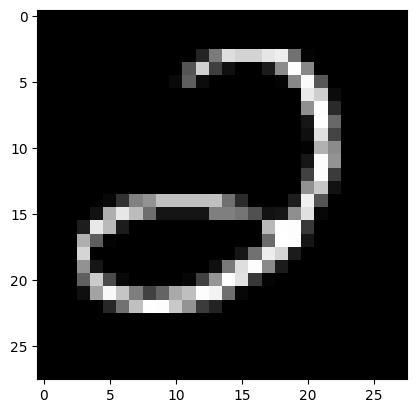

index: 3445
Lable: 0


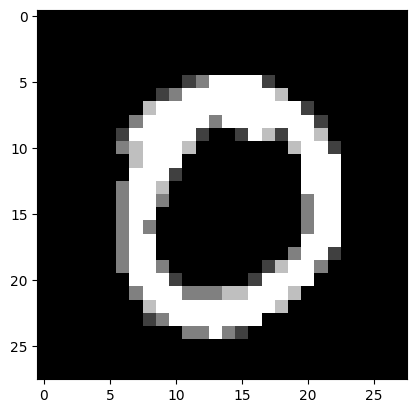

index: 9408
Lable: 9


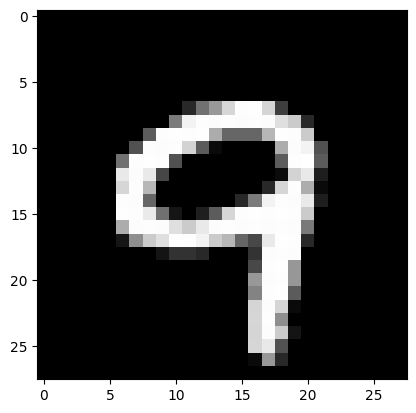

index: 812
Lable: 5


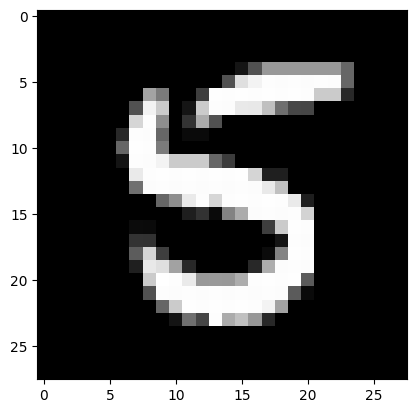

index: 4657
Lable: 3


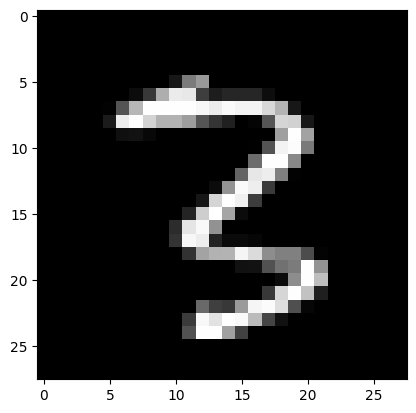

index: 8452
Lable: 4


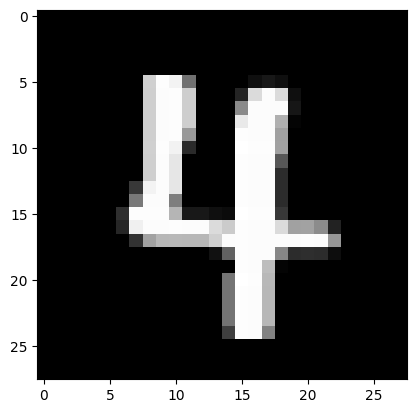

In [ ]:
#Random 10 images with labels(testing)
print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(dataset[1])

In [ ]:
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))

print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

In [ ]:
def reduce_dataset(images, labels, num_per_label):
    reduced_images = []
    reduced_labels = []
    unique_labels = np.unique(labels)

    for label in unique_labels:
        indices = np.where(labels == label)[0]
        random_indices = np.random.choice(indices, num_per_label, replace=False)
        reduced_images.extend(images[random_indices])
        reduced_labels.extend(labels[random_indices])

    return np.array(reduced_images), np.array(reduced_labels)
    # Load the MNIST dataset from Keras
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reduce the size of the training and testing datasets
num_per_label_train = 600
num_per_label_test = 100
reduced_train_images, reduced_train_labels = reduce_dataset(train_images, train_labels, num_per_label_train)
reduced_test_images, reduced_test_labels = reduce_dataset(test_images, test_labels, num_per_label_test)

# Create a new dataset in the same format as the original dataset
new_dataset = ((reduced_train_images, reduced_train_labels), (reduced_test_images, reduced_test_labels))

# Print the size of the new reduced dataset
print(f"New training dataset size: {len(reduced_train_images)} images")
print(f"New testing dataset size: {len(reduced_test_images)} images")
def count_images_per_class(labels):
    class_counts = np.zeros(10, dtype=int)
    for label in labels:
        class_counts[label] += 1
    return class_counts

# Count the number of images for each class in the reduced training dataset
reduced_train_class_counts = count_images_per_class(reduced_train_labels)
print("Reduced Training Dataset - Number of images per class:")
for class_label, count in enumerate(reduced_train_class_counts):
    print("Class", class_label, ":", count, "images")

# Count the number of images for each class in the reduced testing dataset
reduced_test_class_counts = count_images_per_class(reduced_test_labels)
print("Reduced Testing Dataset - Number of images per class:")
for class_label, count in enumerate(reduced_test_class_counts):
    print("Class", class_label, ":", count, "images")

New training dataset size: 6000 images
New testing dataset size: 1000 images
Reduced Training Dataset - Number of images per class:
Class 0 : 600 images
Class 1 : 600 images
Class 2 : 600 images
Class 3 : 600 images
Class 4 : 600 images
Class 5 : 600 images
Class 6 : 600 images
Class 7 : 600 images
Class 8 : 600 images
Class 9 : 600 images
Reduced Testing Dataset - Number of images per class:
Class 0 : 100 images
Class 1 : 100 images
Class 2 : 100 images
Class 3 : 100 images
Class 4 : 100 images
Class 5 : 100 images
Class 6 : 100 images
Class 7 : 100 images
Class 8 : 100 images
Class 9 : 100 images


In [ ]:
# Print the number of images in the training and testing datasets
print(f"There are {len(dataset[0][0])} images in the training dataset.")
print(f"There are {len(dataset[1][0])} images in the testing dataset.")
# Print the number of labels in the training and testing datasets
print(f"There are {len(dataset[0][1])} labels in the training dataset for {len(dataset[0][0])} images in the training dataset.")
print(f"There are {len(dataset[1][1])} labels in the testing dataset for {len(dataset[1][0])} images in the testing dataset.")

There are 60000 images in the training dataset.
There are 10000 images in the testing dataset.
There are 60000 labels in the training dataset for 60000 images in the training dataset.
There are 10000 labels in the testing dataset for 10000 images in the testing dataset.


In [ ]:
# Display total Shape of the Images testing and traing
print('The Shape of the Traning Dataset: {}'.format(dataset[0][0].shape))
print('The Shape of the Testing Dataset: {}'.format(dataset[1][0].shape))

The Shape of the Traning Dataset: (60000, 28, 28)
The Shape of the Testing Dataset: (10000, 28, 28)
